# What technologies should you learn to land one of the Top-3 in-demand roles?

In [13]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import ast

from collections import Counter

df = pd.read_csv('/Users/kolesnikevgenia/Documents/Python_Projects/Job_Skills/Raw_Data/df_Final.csv')

In [17]:
df_technology = df['job_type_skills'].copy()

df_technology = df_technology.drop_duplicates()
df_technology = df_technology.dropna()

#combine all dictionaries into one
technology_dict = {}
for row in df_technology:
    row_dict = ast.literal_eval(row)
    for key, value in row_dict.items():
        if key in technology_dict:
            technology_dict[key] += value
        else:
            technology_dict[key] = value

#remove duplicates by converting values to set then back to list
for key, value in technology_dict.items():
    technology_dict[key] = list(set(value))

df_technology = pd.DataFrame(list(technology_dict.items()), columns=['technology', 'skills'])

df_technology = df_technology.explode('skills')
df_technology.head(5)

,technology,skills
0,analyst_tools,sap
0,analyst_tools,ssis
0,analyst_tools,powerpoint
0,analyst_tools,tableau
0,analyst_tools,spss


In [46]:
df_exploded = df.explode('job_skills')
df_plot = df_exploded.merge(df_technology, left_on='job_skills', right_on='skills').copy()
df_plot.head(5)

,job_title_short,job_title,job_location,job_via,job_schedule_type,job_work_from_home,search_location,job_posted_date,job_no_degree_mention,job_health_insurance,...,company_name,job_skills,job_type_skills,salary_year_avg_eur,salary_month_avg_eur,country,is_eu,region_group,technology,skills


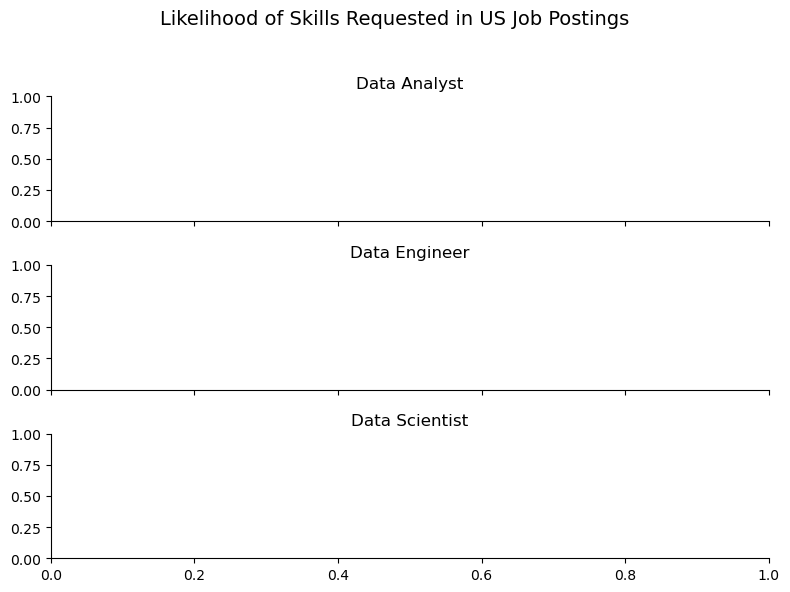

In [32]:
# Filter data
top_roles = ['Data Analyst', 'Data Engineer', 'Data Scientist']
df_plot_top3 = df_plot[df_plot['job_title_short'].isin(top_roles) & df_plot['technology'].notna()]

# Define color palette
black_color = '#333333'
blue_color = '#4c78a8'

# Create subplots
fig, axes = plt.subplots(3, 1, figsize=(8, 6), sharex=True)
fig.suptitle('Likelihood of Skills Requested in US Job Postings', fontsize=14)

# Loop through each role
for ax, role in zip(axes, top_roles):
    skill_series = (
        df_plot_top3[df_plot_top3['job_title_short'] == role]['technology']
        .str.split(', ')
        .explode()
    )
    
    skill_counts = skill_series.value_counts(normalize=True).head(5)  # Top 5
    colors = [black_color if i == 0 else blue_color for i in range(len(skill_counts))]
    
    sns.barplot(
        x=skill_counts.values * 100,
        y=skill_counts.index,
        ax=ax,
        palette=colors
    )
    
    # Annotate bars
    for i, (val, skill) in enumerate(zip(skill_counts.values, skill_counts.index)):
        ax.text(val * 100 + 1, i, f'{int(val*100)}%', va='center')

    ax.set_title(role)
    ax.set_xlabel('')
    ax.set_ylabel('')

# Clean up layout
plt.tight_layout(rect=[0, 0, 1, 0.95])
sns.despine()
plt.show()